The main aim of this project is to create a machine learning model that predicts the number of medals that each country will win in a particular olympics event. This is done by making use of a neural network model. We will also evaluate the perfomance of the neural network model, and compare it to a linear regression model that we have already built.


In [ ]:
import pandas as pd
import sklearn

teams = pd.read_csv('teams.csv')

teams


In [ ]:
# WE GET REED OF THE SOME OF THE COLUMNS THAT WE DEEM NOT USEFUL.

teams = teams[['team', 'country', 'year', 'athletes', 'age', 'prev_medals', 'medals']]
teams

In [ ]:
# CHECK THE CORRELATION BETWEEN THE MEDALS COLUMN AND OTHER COLUMNS
teams.corr()['medals']

In [ ]:
import seaborn as sns
 # Plotting the relationship between number of athletes and the number of models won.
sns.lmplot(x='athletes', y='medals', data=teams, fit_reg=True, ci=None)

In [ ]:
# Plotting the relationshinp between the number of medals won in previous events and the number of medals in the current event.
sns.lmplot(x='prev_medals',  y='medals', data=teams, fit_reg=True, ci=None)


We see from the correlation function table displayed and the two graphs shown that there is a strong correlation (0.841) between the number of athletes that a country has in an Olympics event, and the medals they win. There is an even stronger correlation (0.920) between th number of medals won in the previous Olympics by a country, and the number of medals won in the current olympics. These two strong correlation suggest that we have two features that we can use to train our model and make poredictions.

In [2]:
# WE NOW FIND AND REMOVE MISSING ROW VALUES FROM THE DATAFRAME TO AVOID ENCOUNTERING ERROR ONCE WE START TRAINING THE MODEL.
teams[teams.isnull().any(axis=1)]

teams = teams.dropna()
teams


,team,country,year,events,athletes,age,height,weight,medals,prev_medals,prev_3_medals
0,AFG,Afghanistan,1964,8,8,22.0,161.0,64.2,0,0.0,0.0
1,AFG,Afghanistan,1968,5,5,23.2,170.2,70.0,0,0.0,0.0
2,AFG,Afghanistan,1972,8,8,29.0,168.3,63.8,0,0.0,0.0
3,AFG,Afghanistan,1980,11,11,23.6,168.4,63.2,0,0.0,0.0
4,AFG,Afghanistan,2004,5,5,18.6,170.8,64.8,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2139,ZIM,Zimbabwe,2000,19,26,25.0,179.0,71.1,0,0.0,0.0
2140,ZIM,Zimbabwe,2004,11,14,25.1,177.8,70.5,3,0.0,0.0
2141,ZIM,Zimbabwe,2008,15,16,26.1,171.9,63.7,4,3.0,1.0
2142,ZIM,Zimbabwe,2012,8,9,27.3,174.4,65.2,0,4.0,2.3


For the training and testing of the model, we will all data from the 2008 Olympics going down for our training, and all the data from 2012 upwards for the testing of the model. We do this because we do not want the model to pick up biases during it's training. Thus we have to make our testing data an entire different set of data that the model has not seen yet.

In [3]:
train_set = teams[teams['year'] < 2012].copy() # This is the training set for the model
test_set = teams[teams['year'] > 2012].copy() # This is the training


In [4]:
from re import VERBOSE
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

predictors = ['athletes', 'prev_medals'] # Features
target = 'medals' # Target

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(train_set[predictors])
X_test_scaled = scaler.fit_transform(test_set[predictors])

# We now build the neural network model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)  # Output layer with one neuron for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

# We then train the model
history = model.fit(X_train_scaled, train_set[target], epochs=50, batch_size=32, validation_split =0.3, verbose=1)

#  We evaluate the model on the test set
mse = model.evaluate(X_test_scaled, test_set[target], verbose=0)

print('Test MSE:', mse) # Prints the mse for the test set

# We freaking finally make the predictions
predictions = model.predict(X_test_scaled)

# We then calculate Mean Squared Error (MSE)
mse = mean_squared_error(test_set[target], predictions)
print('Actual MSE:', mse)

Epoch 1/50
36/36 [==============================] - 1s 11ms/step - loss: 710.1140 - accuracy: 0.5906 - val_loss: 2470.1118 - val_accuracy: 0.5839
Epoch 2/50
36/36 [==============================] - 0s 5ms/step - loss: 623.7626 - accuracy: 0.1012 - val_loss: 2146.8914 - val_accuracy: 0.1077
Epoch 3/50
36/36 [==============================] - 0s 5ms/step - loss: 465.4579 - accuracy: 0.0719 - val_loss: 1559.5380 - val_accuracy: 0.1077
Epoch 4/50
36/36 [==============================] - 0s 4ms/step - loss: 266.4947 - accuracy: 0.0808 - val_loss: 935.7714 - val_accuracy: 0.2940
Epoch 5/50
36/36 [==============================] - 0s 5ms/step - loss: 157.3256 - accuracy: 0.4973 - val_loss: 558.5261 - val_accuracy: 0.5466
Epoch 6/50
36/36 [==============================] - 0s 4ms/step - loss: 125.7387 - accuracy: 0.5675 - val_loss: 489.4197 - val_accuracy: 0.5714
Epoch 7/50
36/36 [==============================] - 0s 5ms/step - loss: 117.1960 - accuracy: 0.5746 - val_loss: 459.6439 - val_accur

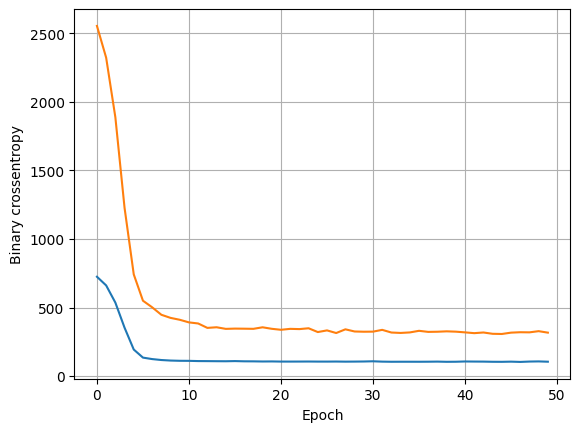

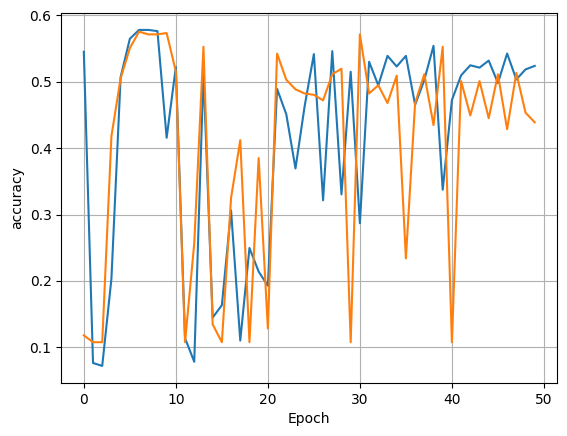

In [9]:
import matplotlib.pyplot as plt

def plot_history(history):
  # We plot the loss and validation loss
  plt.figure()
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Binary crossentropy')
  plt.grid(True)

  # We plot the accuracy and vilidation accuracy
  plt.figure(2)
  plt.plot(history.history['accuracy'], label='accuracy')
  plt.plot(history.history['val_accuracy'], label='val_accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('accuracy')
  plt.grid(True)
  plt.show()

plot_history(history)

The neural network model that we have built seems to be working just fine, as we see that both the loss and validation loss decrease over time and converge to almost a constant value. This suggests that the our model's perfomance converges to a good solution during the training process. But that is not our goal, we actually want to make sure that it's performance is optimized. The loss is still high and the accuracy is low (0.514), this suggest a mediocre model, which still needs lots of improvements. We thus can go a step further and check how different hyperparameters affect the model's perfomance, this will help us make informed decisions about hyperparameter turning. We will investigate the effects of the following hyperparameters on the model's performance, Learning rate, batch size, number of epoches, and the dropout probability hoping that we will have a small loss and a more accurate model. Our target accuracy is at the range of 75% to 100%, and we hope that we can reduce the loss as much as possible.

In [10]:
# We define a fuction that we will use to train our neural network.
def Train_Model(X_train, y_train, num_nodes, lr, batch_size, epochs):
  # We define the architecture of the neural network
  nn_model = tf.keras.Sequential([
      tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(2,)),
      tf.keras.layers.Dropout(0),
      tf.keras.layers.Dense(num_nodes, activation='relu'),
      tf.keras.layers.Dropout(0),
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  # We compile the model
  nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss='binary_crossentropy',
                   metrics=['accuracy'])

  # We train the model
  history = nn_model.fit(
      X_train, y_train, epochs = epochs, batch_size = batch_size, validation_split = 0.2, verbose=0
  )

  return nn_model, history

In [ ]:
#Initialization of variables
least_val_loss = float('inf')
least_loss_model = None
epochs = 100 # We'll go up to 100

# We create nested loops to iterate over different hyperparameters.
for num_nodes in [16, 32, 64]:
  for lr in [0.01, 0.005, 0.001]:
    for batch_size in [32, 64, 128]:
      print(f'{num_nodes} nodes, lr {lr}, batch size {batch_size}')

      # We train the model and obtain it's history
      model, history = Train_Model(X_train_scaled, train_set[target],
                                   num_nodes, lr, batch_size, epochs)
      plot_history(history)

      # We evaluate the model on the validation set and extract validation loss.
      val_loss = model.evaluate(X_test_scaled, test_set[target])[0] # Extracting the validation loss from the list.
      if val_loss < least_val_loss: # We update the model with the least validation loss.
          least_val_loss = val_loss
          least_loss_model = model

After playing around with the different hyperparamters, we realised that the model was not possible to improve beyong an average accuracy of 0.532. This is because neural networks are best suited for classification problems. Thus we decided on sticking with our initial model of Linear Regression as it gave better perfomance.